In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv(r'C:\Users\Hasnain Arain\Downloads\archive (2)\train.csv')
stores = pd.read_csv(r'C:\Users\Hasnain Arain\Downloads\archive (2)\stores.csv')
features = pd.read_csv(r'C:\Users\Hasnain Arain\Downloads\archive (2)\features.csv')

In [5]:
# Converting 'Date' columns to datetime
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

In [6]:
# Merge all together
df = train.merge(stores, on='Store', how='left')
df = df.merge(features, on=['Store', 'Date'], how='left')


In [7]:
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.242170        

In [8]:
# Adding Year-Month column for aggregation
df['YearMonth'] = df['Date'].dt.to_period('M')

In [9]:
# Total sales per month (national level)
monthly_sales = df.groupby('YearMonth')['Weekly_Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

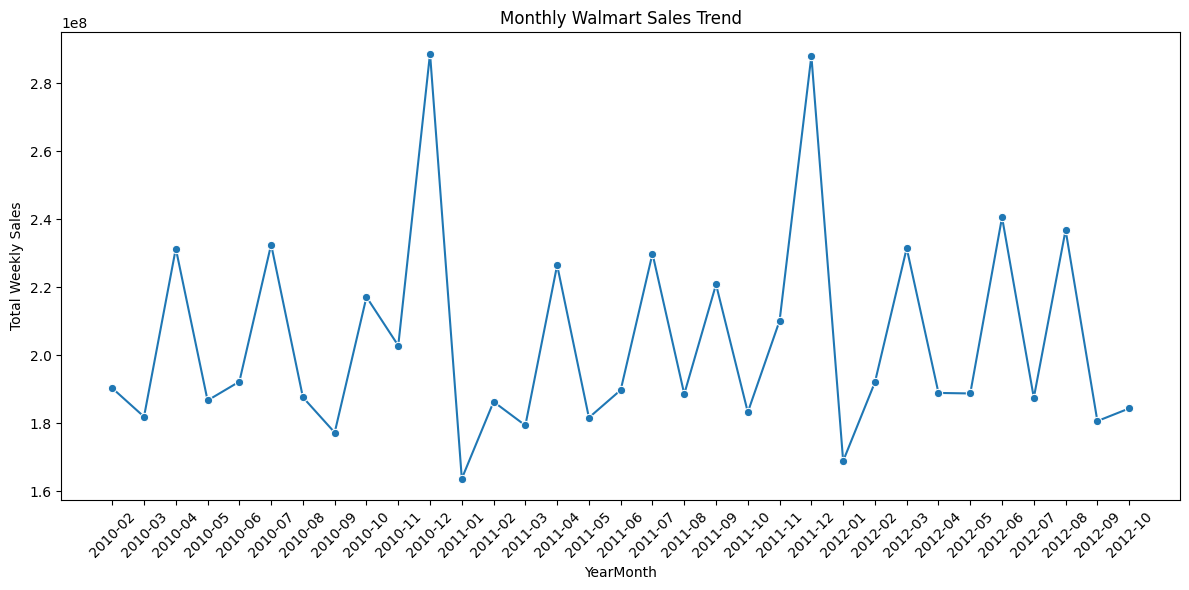

In [11]:
# Plot monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Walmart Sales Trend')
plt.ylabel('Total Weekly Sales')
plt.tight_layout()
plt.show()

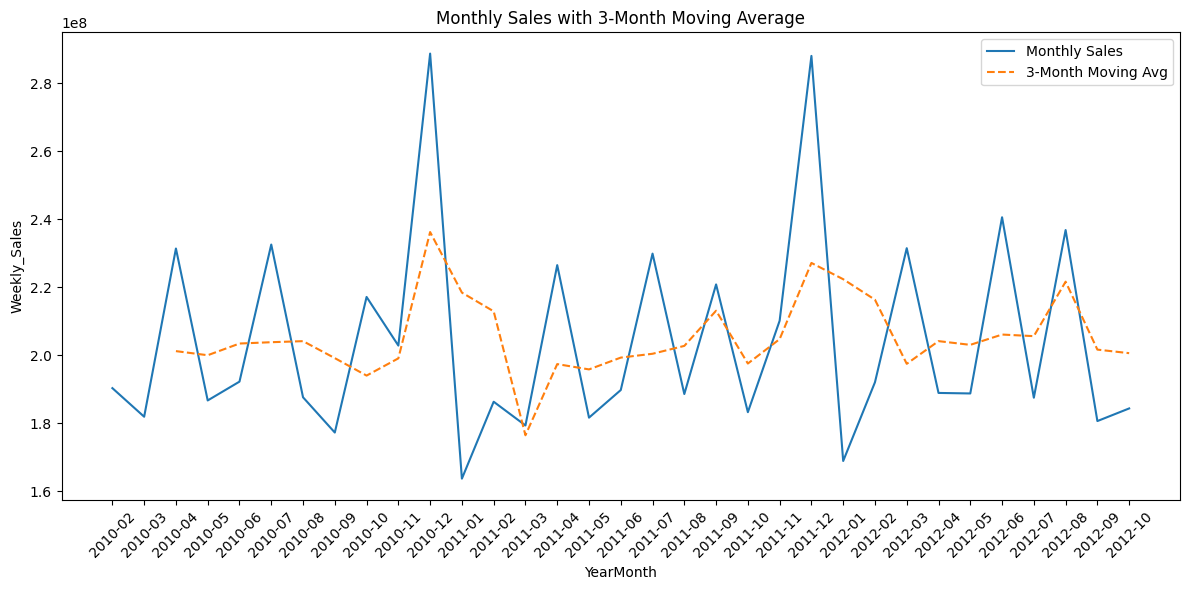

In [12]:
monthly_sales['MA_3'] = monthly_sales['Weekly_Sales'].rolling(3).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Weekly_Sales', data=monthly_sales, label='Monthly Sales')
sns.lineplot(x='YearMonth', y='MA_3', data=monthly_sales, label='3-Month Moving Avg', linestyle='--')
plt.xticks(rotation=45)
plt.title('Monthly Sales with 3-Month Moving Average')
plt.tight_layout()
plt.legend()
plt.show()


In [13]:
# Monthly sales by department
dept_monthly = df.groupby(['YearMonth', 'Dept'])['Weekly_Sales'].sum().reset_index()

In [14]:
#plot top 5 departments
top_depts = dept_monthly.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index

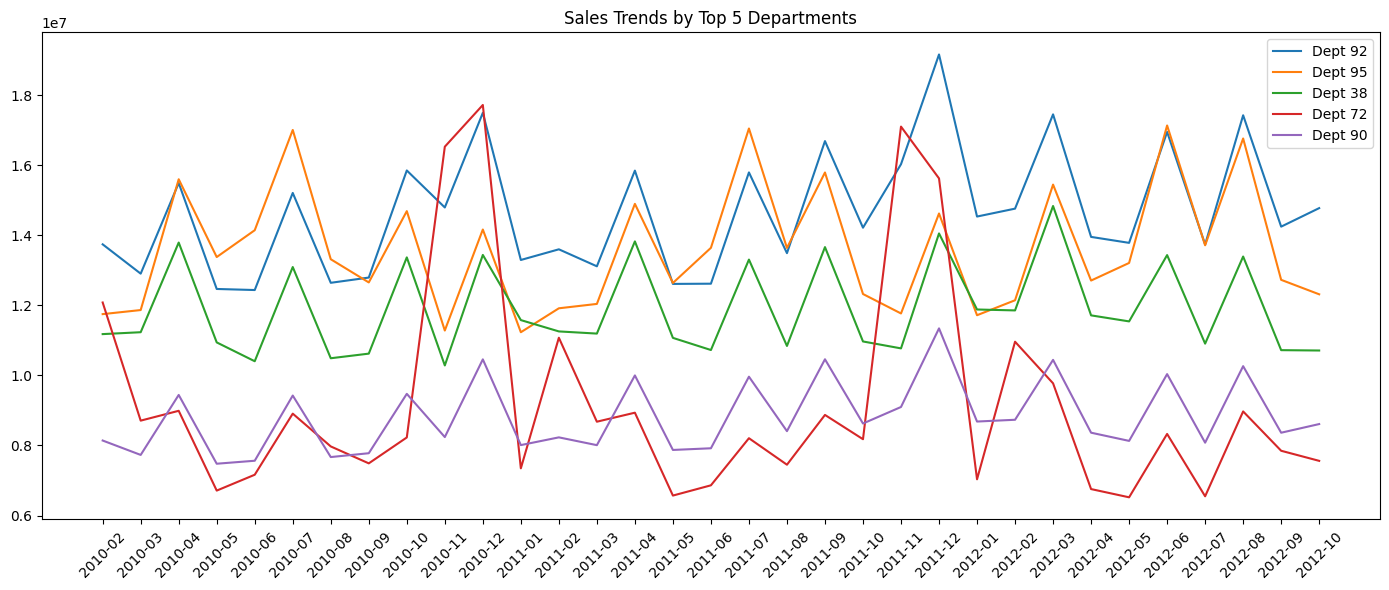

In [26]:
plt.figure(figsize=(14, 6))
for dept in top_depts:
    dept_data = dept_monthly[dept_monthly['Dept'] == dept]
    plt.plot(dept_data['YearMonth'].astype(str), dept_data['Weekly_Sales'], label=f'Dept {dept}')

plt.xticks(rotation=45)
plt.legend()
plt.title('Sales Trends by Top 5 Departments')
plt.tight_layout()
plt.show()

C:\Users\Hasnain Arain\AppData\Local\Temp\ipykernel_15276\1582495947.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


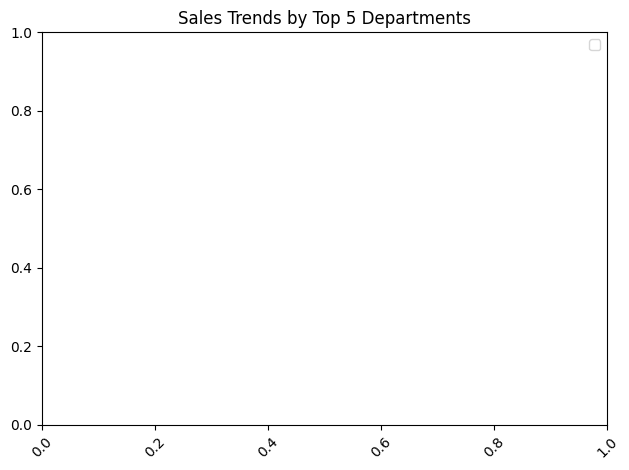

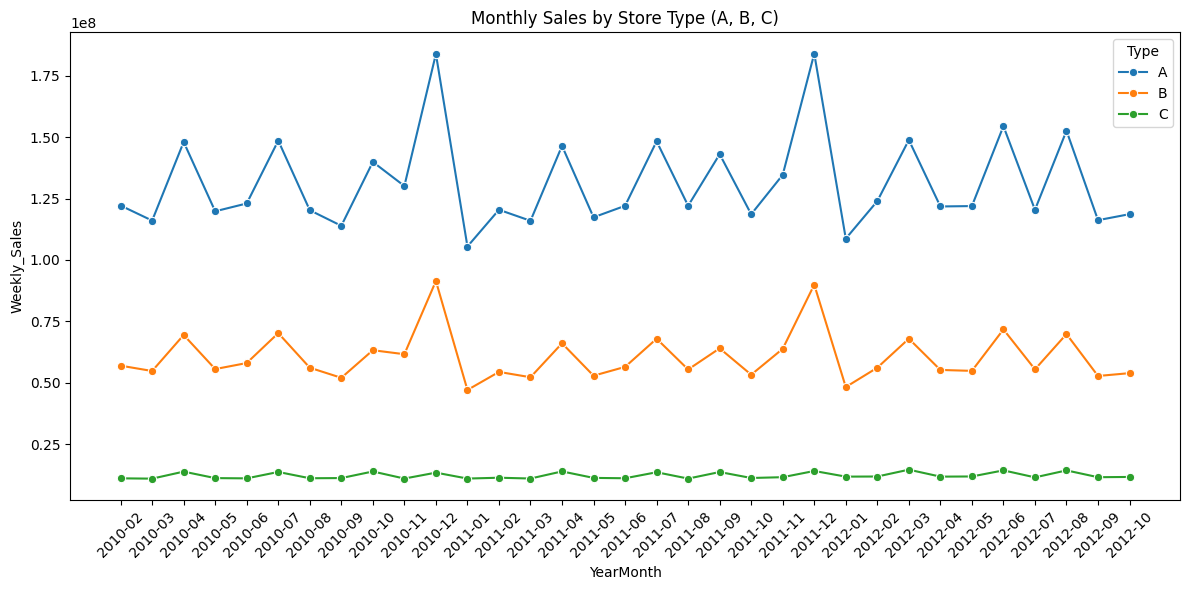

In [21]:
# Monthly sales by store type
region_monthly = df.groupby(['YearMonth', 'Type'])['Weekly_Sales'].sum().reset_index()
region_monthly['YearMonth'] = region_monthly['YearMonth'].astype(str)


plt.figure(figsize=(12, 6))
sns.lineplot(data=region_monthly, x='YearMonth', y='Weekly_Sales', hue='Type', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales by Store Type (A, B, C)')
plt.tight_layout()
plt.show()


In [23]:
# Convert YearMonth to datetime (first day of each month)
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])

ts = monthly_sales.set_index('YearMonth')['Weekly_Sales']
ts.index.freq = 'MS'  # MS = Month Start



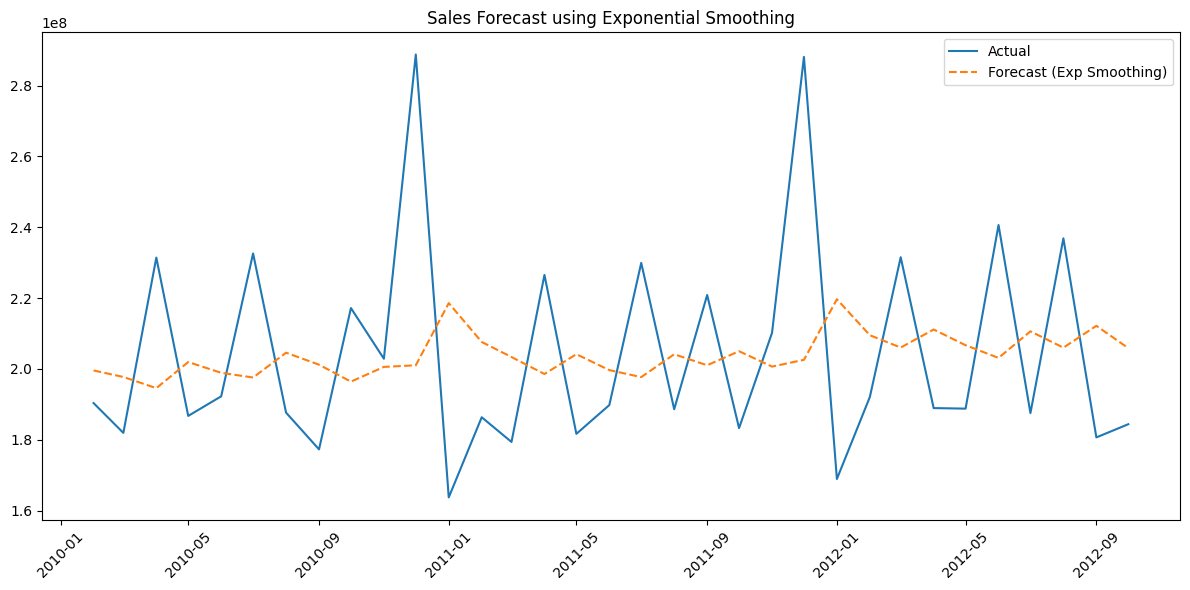

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Applying exponential smoothing
model = SimpleExpSmoothing(ts, initialization_method="estimated").fit(smoothing_level=0.2)
forecast = model.fittedvalues

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label='Actual')
plt.plot(ts.index, forecast.values, label='Forecast (Exp Smoothing)', linestyle='--')
plt.xticks(rotation=45)
plt.title('Sales Forecast using Exponential Smoothing')
plt.legend()
plt.tight_layout()
plt.show()

